# フィーチャの編集

ArcGIS API for Python を使用すると、フィーチャの編集が容易になります。FeatureLayer クラスの edit_features() メソッドを使用して編集を行うことができます。以下の例では、ポイント フィーチャ レイヤーにフィーチャを追加、更新、および削除する方法をご紹介します。

In [112]:
from arcgis.gis import GIS
gis = GIS("https://www.arcgis.com", "<ユーザー名>", "<パスワード>")

<Item title:"品川区避難場所" type:Feature Layer Collection owner:ejmaruyama>
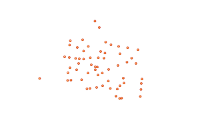

In [78]:
#フィーチャ レイヤーの検索
search_result = gis.content.search('title:品川区避難場所',item_type="Feature Layer")
search_result[0]

In [79]:
#レイヤーにアクセス
item = search_result[0]
layer = item.layers
layer

[<FeatureLayer url:"https://services.arcgis.com/wlVTGRSYTzAbjjiC/arcgis/rest/services/品川区避難場所/FeatureServer/0">]

## フィーチャのクエリ

In [84]:
# FeatureSet の取得
fset = layer[0].query("カテゴリ = '広域避難場所'") #query に何も指定しない場合はすべてのフィーチャを返します。 

FeatureSet クラスの sdf プロパティは、フィーチャを Pandas のデータフレームとして可視化することができます。

In [85]:
fset.sdf

,施設名,カテゴリ,都道府県名,住所,住所_かな_,緯度,経度,ObjectId,SHAPE
0,高輪三丁目・四丁目・御殿山地区,広域避難場所,東京都,港区高輪、品川区北品川,None,35.622200,139.737005,52,"{""x"": 15555452.241577126, ""y"": 4248760.4258717..."
1,自然教育園・聖心女子学院一帯,広域避難場所,東京都,港区白金、白金台,None,35.636276,139.720726,53,"{""x"": 15553640.071586499, ""y"": 4250688.2386469..."
2,JRアパート・品川区役所一帯,広域避難場所,東京都,品川区広町,None,35.609226,139.730186,54,"{""x"": 15554693.153969403, ""y"": 4246983.8407009..."
3,大井ふ頭一帯,広域避難場所,東京都,品川区八潮、大田区城南島、東海,None,35.594188,139.751807,55,"{""x"": 15557099.992679846, ""y"": 4244924.9836686..."
4,大井競馬場・しながわ区民公園,広域避難場所,東京都,品川区勝島,None,35.593274,139.739123,56,"{""x"": 15555688.016258623, ""y"": 4244799.8601284..."
5,東京工業大学,広域避難場所,東京都,目黒区大岡山、大田区石川町,None,35.604224,139.682784,57,"{""x"": 15549416.387466822, ""y"": 4246298.9724559..."
6,林試の森公園,広域避難場所,東京都,品川区小山台、目黒区下目黒,None,35.625238,139.703786,58,"{""x"": 15551754.319412462, ""y"": 4249176.4738195..."
7,天王洲アイル周辺,広域避難場所,東京都,品川区東品川,None,35.620331,139.750215,60,"{""x"": 15556922.772050502, ""y"": 4248504.4779598..."
8,大崎駅西口地区一帯_変更前,広域避難場所,東京都,品川区大崎,None,35.618461,139.727625,61,"{""x"": 15554408.06475348, ""y"": 4248248.39909082..."


## レイヤーが編集可能か確認
フィーチャーレイヤーを編集できるようにするには、編集を有効化する必要があります。これは、FeatureLayer クラスの capabilities プロパティにアクセスすることで確認できます。

In [90]:
flayer = layer[0]
flayer.properties.capabilities

'Create,Delete,Query,Update,Editing'

## フィーチャの編集
上記のフィーチャ レイヤーは、編集、更新、削除機能を有効化しているので、編集操作を行うことができます。

### フィーチャの更新
フィーチャを更新するには、FeatureLayer クラスの edit_features() メソッドを使用します。

In [91]:
shinagawa_features = fset.features

# フィーチャを選択
feature = [f for f in shinagawa_features if f.attributes['施設名']=='大崎駅西口地区一帯_変更前'][0]
feature.attributes

{'施設名': '大崎駅西口地区一帯_変更前',
 'カテゴリ': '広域避難場所',
 '都道府県名': '東京都',
 '住所': '品川区大崎',
 '住所_かな_': None,
 '緯度': 35.618461,
 '経度': 139.727625,
 'ObjectId': 61,
 'SHAPE': {'x': 15554408.06475348,
  'y': 4248248.399090822,
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}}

上で取得したフィーチャの施設名を「大崎駅西口地区一帯_変更後」に編集してみましょう

In [92]:
update_feature = feature
update_feature.attributes['施設名'] = '大崎駅西口地区一帯_変更後'

In [93]:
display(update_feature)

{"geometry": {"x": 15554408.06475348, "y": 4248248.399090822, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}, "attributes": {"\u65bd\u8a2d\u540d": "\u5927\u5d0e\u99c5\u897f\u53e3\u5730\u533a\u4e00\u5e2f_\u5909\u66f4\u5f8c", "\u30ab\u30c6\u30b4\u30ea": "\u5e83\u57df\u907f\u96e3\u5834\u6240", "\u90fd\u9053\u5e9c\u770c\u540d": "\u6771\u4eac\u90fd", "\u4f4f\u6240": "\u54c1\u5ddd\u533a\u5927\u5d0e", "\u4f4f\u6240_\u304b\u306a_": null, "\u7def\u5ea6": 35.618461, "\u7d4c\u5ea6": 139.727625, "ObjectId": 61, "SHAPE": {"x": 15554408.06475348, "y": 4248248.399090822, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}}}

このフィーチャ オブジェクトを edit_features() メソッドで編集してみましょう。

In [94]:
update_result = flayer.edit_features(updates=[update_feature])
update_result

{'addResults': [],
 'updateResults': [{'objectId': 61,
   'uniqueId': 61,
   'globalId': None,
   'success': True}],
 'deleteResults': []}

In [95]:
fset.sdf

,施設名,カテゴリ,都道府県名,住所,住所_かな_,緯度,経度,ObjectId,SHAPE
0,高輪三丁目・四丁目・御殿山地区,広域避難場所,東京都,港区高輪、品川区北品川,None,35.622200,139.737005,52,"{""x"": 15555452.241577126, ""y"": 4248760.4258717..."
1,自然教育園・聖心女子学院一帯,広域避難場所,東京都,港区白金、白金台,None,35.636276,139.720726,53,"{""x"": 15553640.071586499, ""y"": 4250688.2386469..."
2,JRアパート・品川区役所一帯,広域避難場所,東京都,品川区広町,None,35.609226,139.730186,54,"{""x"": 15554693.153969403, ""y"": 4246983.8407009..."
3,大井ふ頭一帯,広域避難場所,東京都,品川区八潮、大田区城南島、東海,None,35.594188,139.751807,55,"{""x"": 15557099.992679846, ""y"": 4244924.9836686..."
4,大井競馬場・しながわ区民公園,広域避難場所,東京都,品川区勝島,None,35.593274,139.739123,56,"{""x"": 15555688.016258623, ""y"": 4244799.8601284..."
5,東京工業大学,広域避難場所,東京都,目黒区大岡山、大田区石川町,None,35.604224,139.682784,57,"{""x"": 15549416.387466822, ""y"": 4246298.9724559..."
6,林試の森公園,広域避難場所,東京都,品川区小山台、目黒区下目黒,None,35.625238,139.703786,58,"{""x"": 15551754.319412462, ""y"": 4249176.4738195..."
7,天王洲アイル周辺,広域避難場所,東京都,品川区東品川,None,35.620331,139.750215,60,"{""x"": 15556922.772050502, ""y"": 4248504.4779598..."
8,大崎駅西口地区一帯_変更後,広域避難場所,東京都,品川区大崎,None,35.618461,139.727625,61,"{""x"": 15554408.06475348, ""y"": 4248248.39909082..."


### フィーチャの追加
フィーチャ レイヤーにフィーチャを追加するには、edit_features() メソッドを呼び出して、フィーチャの情報を辞書型(dictionary) で渡します。

In [96]:
# 追加するフィーチャ
dict = {"attributes": 
        {'施設名': '戸越公園',
         'カテゴリ': '広域避難場所',
         '都道府県名': '東京都',
         '住所': '品川区豊町',
         '緯度': 35.610598,
         '経度': 139.722376},
        "geometry":
        {'x': 15553823.748746308,'y': 4247171.700889459}}

In [97]:
add_result = flayer.edit_features(adds = [dict])

In [98]:
add_result

{'addResults': [{'objectId': 64,
   'uniqueId': 64,
   'globalId': None,
   'success': True}],
 'updateResults': [],
 'deleteResults': []}

### フィーチャの削除
edit_features()メソッドは、削除したいフィーチャのオブジェクトIDを deletes パラメーターに渡すことで削除することができます。

In [105]:
fset = layer[0].query(where = "カテゴリ = '広域避難場所'")
fset.sdf

,施設名,カテゴリ,都道府県名,住所,住所_かな_,緯度,経度,ObjectId,SHAPE
0,高輪三丁目・四丁目・御殿山地区,広域避難場所,東京都,港区高輪、品川区北品川,None,35.622200,139.737005,52,"{""x"": 15555452.241577126, ""y"": 4248760.4258717..."
1,自然教育園・聖心女子学院一帯,広域避難場所,東京都,港区白金、白金台,None,35.636276,139.720726,53,"{""x"": 15553640.071586499, ""y"": 4250688.2386469..."
2,JRアパート・品川区役所一帯,広域避難場所,東京都,品川区広町,None,35.609226,139.730186,54,"{""x"": 15554693.153969403, ""y"": 4246983.8407009..."
3,大井ふ頭一帯,広域避難場所,東京都,品川区八潮、大田区城南島、東海,None,35.594188,139.751807,55,"{""x"": 15557099.992679846, ""y"": 4244924.9836686..."
4,大井競馬場・しながわ区民公園,広域避難場所,東京都,品川区勝島,None,35.593274,139.739123,56,"{""x"": 15555688.016258623, ""y"": 4244799.8601284..."
5,東京工業大学,広域避難場所,東京都,目黒区大岡山、大田区石川町,None,35.604224,139.682784,57,"{""x"": 15549416.387466822, ""y"": 4246298.9724559..."
6,林試の森公園,広域避難場所,東京都,品川区小山台、目黒区下目黒,None,35.625238,139.703786,58,"{""x"": 15551754.319412462, ""y"": 4249176.4738195..."
7,天王洲アイル周辺,広域避難場所,東京都,品川区東品川,None,35.620331,139.750215,60,"{""x"": 15556922.772050502, ""y"": 4248504.4779598..."
8,大崎駅西口地区一帯_変更後,広域避難場所,東京都,品川区大崎,None,35.618461,139.727625,61,"{""x"": 15554408.06475348, ""y"": 4248248.39909082..."
9,戸越公園,広域避難場所,東京都,品川区豊町,None,35.610598,139.722376,64,"{""x"": 15553823.748746308, ""y"": 4247171.7008894..."


In [106]:
# 削除するフィーチャのオブジェクトIDを取得
delete_features = fset.features
delete_feature = [f for f in delete_features if f.attributes['施設名'] == '戸越公園'][0]
oid = delete_feature.get_value('ObjectId')
oid

64

In [108]:
type(oid)

int

In [110]:
# フィーチャの削除
delete_result = flayer.edit_features(deletes=str(oid))
delete_result

{'addResults': [],
 'updateResults': [],
 'deleteResults': [{'objectId': 64,
   'uniqueId': 64,
   'globalId': None,
   'success': True}]}

##  編集の結果を確認する
フィーチャの追加、削除、編集が完了しました。もう一度データフレームを表示して確認してみましょう。
編集が適用され、削除したフィーチャは表示されなくなったことがわかります。

In [111]:
fset_edited = flayer.query()
fset_edited.sdf

,施設名,カテゴリ,都道府県名,住所,住所_かな_,緯度,経度,ObjectId,SHAPE
0,品川学園,避難所,東京都,品川区北品川3-9-30,None,35.618050,139.737982,1,"{""x"": 15555561.000719627, ""y"": 4248192.1173184..."
1,大崎駅西口地区一帯_変更後,地域センター,東京都,東京都品川区北品川3-11-16,None,35.616681,139.740080,2,"{""x"": 15555784.975500004, ""y"": 4248003.4179999..."
2,台場小学校,避難所,東京都,品川区東品川1-8-30,None,35.621383,139.743185,3,"{""x"": 15556140.196030226, ""y"": 4248648.5420731..."
3,城南小学校,避難所,東京都,品川区南品川2-8-21,None,35.613329,139.742746,4,"{""x"": 15556091.326773766, ""y"": 4247545.6508397..."
4,浅間台小学校,避難所,東京都,品川区南品川6-8-8,None,35.611484,139.736494,5,"{""x"": 15555395.357317327, ""y"": 4247293.0175629..."
5,城南第二小学校,避難所,東京都,品川区東品川3-4-5,None,35.615579,139.745990,6,"{""x"": 15556452.4472019, ""y"": 4247853.748087985..."
6,東海中学校,避難所,東京都,品川区東品川3-30-15,None,35.612621,139.748971,7,"{""x"": 15556784.290603956, ""y"": 4247448.7046981..."
7,日野学園,避難所,東京都,品川区東五反田2-11-1,None,35.624505,139.728169,8,"{""x"": 15554468.622556476, ""y"": 4249076.0895070..."
8,第三日野小学校,避難所,東京都,品川区上大崎1-19-19,None,35.632801,139.723819,9,"{""x"": 15553984.382771522, ""y"": 4250212.2800228..."
9,第四日野小学校,避難所,東京都,品川区西五反田4-29-9,None,35.625804,139.712343,10,"{""x"": 15552706.88029518, ""y"": 4249253.98812030..."
